In [73]:
# Import libraries
import pandas as pd
import numpy as np
import random
import os
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = None

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Set seed for reproducability
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)

In [74]:
#import data
datapath = '/kaggle/input/sa-power-combine-features2/Combines_Features_SA.xlsx'
data = pd.read_excel(datapath,"combine data")
data = data[data.Year <=2021]


In [75]:
data.columns

Index(['Year', 'Passenger_vehicles', 'Campervans', 'Light commercial vehicles',
       'Light rigid trucks', 'Heavy rigid trucks', 'Articulated trucks',
       'Non-freight carrying vehicles', 'Buses', 'Motorcycles',
       'Total_Vehicls', 'Passenger vehicles_per_1000_population',
       'Campervans_per_1000_population',
       'Light commercial vehicles_per_1000_population',
       'Light rigid trucks_per_1000_population',
       'Heavy rigid trucks_per_1000_population',
       'Articulated trucks_per_1000_population',
       'Non-freight carrying vehicles_per_1000_population',
       'Buses_per_1000_population', 'Motorcycles_per_1000_population',
       'Total Motor Vehicles_per_1000_population',
       'Passenger vehicles_ave_age', 'Campervans_ave_age',
       'Light commercial vehicles_ave_age', 'Light rigid trucks_ave_age',
       'Heavy rigid trucks_ave_age', 'Articulated trucks_ave_age',
       'Non-freight carrying vehicles_ave_age', 'Buses_ave_age',
       'Motorcycles_ave_ag

In [81]:
selected_columns = data.drop(columns =['Year','annual operational consumption SA', 'CO2_Electricity']).columns


In [83]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
standardized_data = scaler.fit_transform(data.drop(columns = ['Year','annual operational consumption SA', 'CO2_Electricity']))

# Convert the standardized data back to a DataFrame with original column names
df_ele = pd.DataFrame(standardized_data, columns=selected_columns)

In [92]:

# Top 25 correlated indicators to the target 
top25_corrs = abs(df_ele.corr()['Annual_electricity_consumption_SA']).sort_values(ascending = False).head(25)
top25_corrs.to_csv('Top25_corrs.csv', index = False)



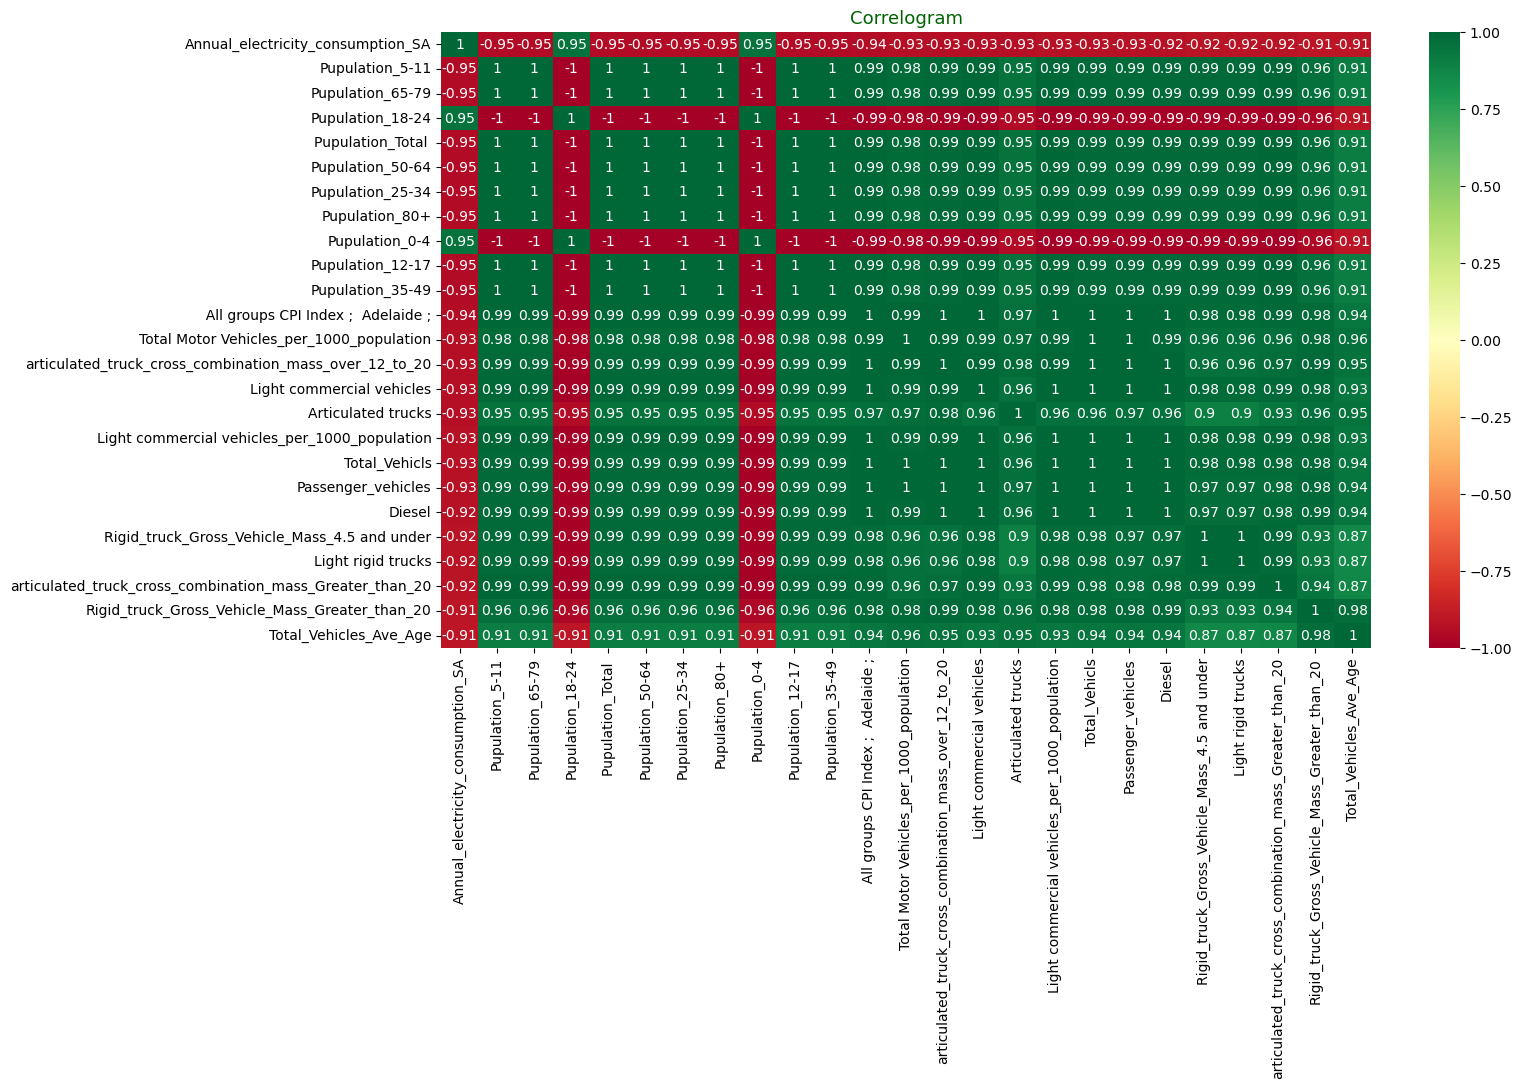

<Figure size 640x480 with 0 Axes>

In [93]:

# Quantify correlations between indicators
corr = df_ele[list(top25_corrs.index)].corr()
plt.figure(figsize = (15, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 13, color = 'darkgreen')
plt.show()
plt.savefig('correlation graphs.png')

       PC1      PC2      PC3
0 -9.92278 -3.32097  0.03659
1 -7.33276 -0.94209 -0.67559
2 -4.26542  3.08853  3.21303
3 -0.00603  3.44434 -1.88136
4  3.46907  0.93774 -1.69334


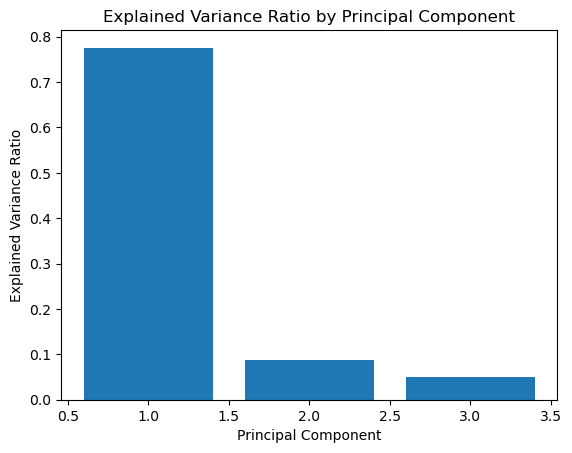

<Figure size 640x480 with 0 Axes>

In [94]:
# Initialize PCA with the number of components you want to retain
n_components = 3  # Replace with the number of components you want
pca = PCA(n_components=n_components)

# Fit PCA on the standardized data
pca_result = pca.fit_transform(df_ele)

# Create a DataFrame to store the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

# Display the first few rows of the PCA results
print(pca_df.head())

# Plot explained variance ratio
explained_variance = pca.explained_variance_ratio_
plt.bar(range(1, n_components + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()
plt.savefig('PCA analysis resutl.png')

In [95]:
# Get the loadings for the first principal component (PC1)
loadings = pca.components_[0]

# Pair the loadings with the feature names
loadings_df = pd.DataFrame({'Feature':selected_columns , 'Loading': loadings})

# Sort loadings by absolute value in descending order
loadings_df = loadings_df.reindex(loadings_df['Loading'].abs().sort_values(ascending=False).index)

loadings_df.to_csv("key component.csv")